<a href="https://colab.research.google.com/github/adrian-pieroni/challenge2-data-science-LATAM/blob/main/challenge2_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge - Telecom X: Evasión de Clientes (Churn)
##Este notebook forma parte de mi proceso de aprendizaje en análisis de datos,
##como parte del programa Oracle Next Education de Alura Latam.

In [1]:
!git clone https://github.com/adrian-pieroni/challenge2-data-science-LATAM.git

Cloning into 'challenge2-data-science-LATAM'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 261.21 KiB | 2.33 MiB/s, done.
Resolving deltas: 100% (27/27), done.


#📌 Extracción




In [11]:
import os           # Manejo de rutas de archivos
import json         # Lectura de archivos JSON
from itertools import groupby  # Agrupación de secuencias ordenadas

In [12]:
import pandas as pd     # Análisis y manipulación de datos estructurados
import numpy as np      # Operaciones matemáticas y arrays

In [13]:
import seaborn as sns   # Visualización estadística avanzada
import matplotlib.pyplot as plt  # Visualización base y personalización
import matplotlib.ticker as mtick # Formateo de ejes en gráficos
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [18]:
df =pd.read_json('/content/challenge2-data-science-LATAM/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [21]:
# Lista de columnas detectadas en exploracion
columnas_con_dict = ['customer', 'phone', 'internet', 'account']

# Expandir columnas
for columna in columnas_con_dict:
    columnas_expandida = pd.json_normalize(df[columna])
    columnas_expandida.columns = [f"{columna}.{subcol}" for subcol in columnas_expandida.columns]

    df = pd.concat([df, columnas_expandida], axis=1)
    df.drop(columns=[columna], inplace=True)

# Mostrar columnas
print("Columnas después de desanidar:")
print(df.columns)

Columnas después de desanidar:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [22]:
df.columns = df.columns.str.replace('.', '_')

In [23]:
columnas_expandidas = []
for col in columnas_con_dict:
    columnas_expandidas.extend([c for c in df.columns if c.startswith(col + '_')])

# Eliminar filas que tengan valores nulos en alguna de las columnas expandidas
df = df.dropna(subset=columnas_expandidas)
print(f"Filas restantes después de eliminar nulos en columnas anidadas: {df.shape[0]}")

Filas restantes después de eliminar nulos en columnas anidadas: 7267


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [28]:
print(df.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')


In [29]:
print(df.dtypes)

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


In [30]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [31]:
if duplicados > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados.")
else:
    print("No se encontraron duplicados.")

No se encontraron duplicados.


In [33]:
nulos = df.isnull().sum()
print("Valores nulos por columna:\n", nulos)
print(f"Total de filas en df: {df.shape[0]}")

Valores nulos por columna:
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64
Total de filas en df: 7267


In [34]:
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

print("Tipos de datos después de la conversión:")
print(df[['account_Charges_Monthly', 'account_Charges_Total']].dtypes)

print("\nValores de ejemplo:")
print(df[['account_Charges_Monthly', 'account_Charges_Total']].head())

Tipos de datos después de la conversión:
account_Charges_Monthly    float64
account_Charges_Total      float64
dtype: object

Valores de ejemplo:
   account_Charges_Monthly  account_Charges_Total
0                     65.6                 593.30
1                     59.9                 542.40
2                     73.9                 280.85
3                     98.0                1237.85
4                     83.9                 267.40


In [35]:
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

In [36]:
df['Churn'] = df['Churn'].replace(['', ' ', 'None'], np.nan)

In [37]:
df = df.dropna(subset=['Churn'])

In [38]:
nulos_totales = df.isnull().sum()
nulos_porcentaje = (nulos_totales / len(df)) * 100
nulos_df = pd.DataFrame({'Nulos': nulos_totales, 'Porcentaje': nulos_porcentaje})
nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

print("Resumen de columnas con valores nulos:")
print(nulos_df)

Resumen de columnas con valores nulos:
                       Nulos  Porcentaje
account_Charges_Total     11    0.156183


In [40]:
filas, columnas = df.shape
shape_texto = f"{filas} filas x {columnas} columnas"

tabla_resumen = pd.DataFrame({
    "Columnas disponibles": df.columns.tolist(),
    "Shape del DataFrame": [shape_texto] + [""] * (len(df.columns) - 1)
})


display(tabla_resumen)

,Columnas disponibles,Shape del DataFrame
0,customerID,7043 filas x 22 columnas
1,Churn,
2,customer_gender,
3,customer_SeniorCitizen,
4,customer_Partner,
5,customer_Dependents,
6,customer_tenure,
7,phone_PhoneService,
8,phone_MultipleLines,
9,internet_InternetService,


In [41]:
columnas_ordenadas = sorted(df.columns, key=lambda x: x.split('_')[0])

print("Columnas en df_limpio (agrupadas por categoría):\n")
for i, col in enumerate(columnas_ordenadas, 1):
    print(f"{i:2d}. {col}")

Columnas en df_limpio (agrupadas por categoría):

 1. Churn
 2. Cuentas_Diarias
 3. account_Contract
 4. account_PaperlessBilling
 5. account_PaymentMethod
 6. account_Charges_Monthly
 7. account_Charges_Total
 8. customer_gender
 9. customer_SeniorCitizen
10. customer_Partner
11. customer_Dependents
12. customer_tenure
13. customerID
14. internet_InternetService
15. internet_OnlineSecurity
16. internet_OnlineBackup
17. internet_DeviceProtection
18. internet_TechSupport
19. internet_StreamingTV
20. internet_StreamingMovies
21. phone_PhoneService
22. phone_MultipleLines


In [42]:
df_limpio = df.copy()

In [43]:
try:
    df_limpio.to_csv('TelecomX_df_limpio.csv', index=False)
    print("Archivo guardado como 'TelecomX_df_limpio.csv'")
except Exception as e:
    print(f"Error al guardar CSV: {e}")

Archivo guardado como 'TelecomX_df_limpio.csv'


In [44]:
# Seleccionar columnas tipo objeto (categóricas)
columnas_objeto = df_limpio.select_dtypes(include='object').columns

binarias = []
no_binarias = []

# Identificar variables binarias con valores 'Yes' y 'No'
for col in columnas_objeto:
    valores = sorted(df_limpio[col].dropna().unique())
    if set(valores) == {'No', 'Yes'}:
        binarias.append((col, valores))
    else:
        no_binarias.append((col, valores))

# Mostrar columnas binarias
print("Columnas con valores únicos 'Yes' y 'No':\n" + "-"*50)
for col, vals in binarias:
    print(f"\U0001F7E2 {col:<25}: {vals}")

# Mostrar columnas no binarias
print("\nColumnas NO binarias:\n" + "-"*50)
for col, vals in no_binarias:
    cantidad = len(vals)
    ejemplos = ', '.join(map(str, vals[:3]))
    extra = f"... (+{cantidad - 4})" if cantidad > 4 else ""
    print(f"\U0001F534 {col:<25}: {cantidad} únicos (Ej: {ejemplos} {extra})")

Columnas con valores únicos 'Yes' y 'No':
--------------------------------------------------
🟢 Churn                    : ['No', 'Yes']
🟢 customer_Partner         : ['No', 'Yes']
🟢 customer_Dependents      : ['No', 'Yes']
🟢 phone_PhoneService       : ['No', 'Yes']
🟢 account_PaperlessBilling : ['No', 'Yes']

Columnas NO binarias:
--------------------------------------------------
🔴 customerID               : 7043 únicos (Ej: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ ... (+7039))
🔴 customer_gender          : 2 únicos (Ej: Female, Male )
🔴 phone_MultipleLines      : 3 únicos (Ej: No, No phone service, Yes )
🔴 internet_InternetService : 3 únicos (Ej: DSL, Fiber optic, No )
🔴 internet_OnlineSecurity  : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_OnlineBackup    : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_DeviceProtection: 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_TechSupport     : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_StreamingTV     : 3 ún

In [45]:
df_binario = df_limpio.copy()

In [46]:
# Detectar valores no reconocidos en 'Churn'
valores_unicos = df_binario['Churn'].unique()
if pd.isnull(valores_unicos).any():
    print("Algunos valores de 'Churn' no fueron reconocidos y se asignaron como NaN.")
    print("Valores únicos después del mapeo:", valores_unicos)

In [48]:
col = 'Churn'

# Limpiar texto
df_binario[col] = df_binario[col].astype(str).str.strip().str.capitalize()

# Verificar si hay valores inesperados
valores_esperados = {'Yes', 'No'}
valores_actuales = set(df_binario[col].unique())

valores_no_controlados = valores_actuales - valores_esperados

if valores_no_controlados:
    print(f"Atención: Se encontraron valores no válidos en '{col}': {valores_no_controlados}")

else:
    # Mapear
    df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
    print(f"'{col}' mapeada correctamente. Valores únicos: {df_binario[col].unique()}")

'Churn' mapeada correctamente. Valores únicos: [0 1]


In [49]:
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Aplicar transformación binaria 1/0
for col in columnas_binarias:
    if col in df_binario.columns:
        df_binario[col] = df_binario[col].str.strip().str.capitalize()
        df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
        nulos = df_binario[col].isnull().sum()
        if nulos > 0:
            print(f"Columna '{col}' tiene {nulos} valores no reconocidos tras la conversión.")
    else:
        print(f"Advertencia: la columna '{col}' no existe en df_binario.")


# Verificación
print("\nTransformación de variables binarias completada.\nValores únicos por columna (esperado: [0, 1]):\n")
for col in columnas_binarias:
    if col in df_binario.columns:
        valores_unicos = df_binario[col].dropna().unique()
        print(f"   - {col}: {valores_unicos}")

Columna 'phone_MultipleLines' tiene 682 valores no reconocidos tras la conversión.
Columna 'internet_OnlineSecurity' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_OnlineBackup' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_DeviceProtection' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_TechSupport' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_StreamingTV' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_StreamingMovies' tiene 1526 valores no reconocidos tras la conversión.

Transformación de variables binarias completada.
Valores únicos por columna (esperado: [0, 1]):

   - customer_Partner: [1 0]
   - customer_Dependents: [1 0]
   - phone_PhoneService: [1 0]
   - phone_MultipleLines: [0. 1.]
   - internet_OnlineSecurity: [0. 1.]
   - internet_OnlineBackup: [1. 0.]
   - internet_DeviceProtection: [0. 1.]
   - internet_TechSupport: [1. 0.]
   - internet_Streami

In [51]:
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

df[columnas_binarias].isna().sum()

,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,0
phone_MultipleLines,0
internet_OnlineSecurity,0
internet_OnlineBackup,0
internet_DeviceProtection,0
internet_TechSupport,0
internet_StreamingTV,0
internet_StreamingMovies,0


In [52]:
try:
    df_binario.to_csv("TelecomX_df_binario.csv", index=False)
    print("Archivo 'TelecomX_df_binario.csv' guardado correctamente.")
except Exception as e:
    print(f"Error al guardar CSV binario: {e}")

Archivo 'TelecomX_df_binario.csv' guardado correctamente.



#🔧 Transformación


#📊 Carga y análisis

¿Cuántos clientes hay en total?

In [54]:
total_clientes = df_limpio.shape[0]
print(f"Total de clientes: {total_clientes}")

Total de clientes: 7043


¿Cuál es la proporción general de clientes que abandonan la compañía?

In [55]:
# 1. Calcular total de clientes
total_clientes = df_limpio.shape[0]

# 2. Calcular proporción
churn_counts = df_limpio['Churn'].value_counts(normalize=True)

# 3. Crear DataFrame
resumen_churn = pd.DataFrame({
    'Estado Cliente': ['Abandonaron', 'Se Mantuvieron'],
    'Proporción (%)': [churn_counts.get('Yes', 0) * 100, churn_counts.get('No', 0) * 100]
})

resumen_churn['Proporción (%)'] = resumen_churn['Proporción (%)'].map('{:.2f}%'.format)

print(f"Total de clientes: {total_clientes}\n")
print(resumen_churn)

Total de clientes: 7043

   Estado Cliente Proporción (%)
0     Abandonaron         26.54%
1  Se Mantuvieron         73.46%


2.1 Gráfico de clientes que abandonaron

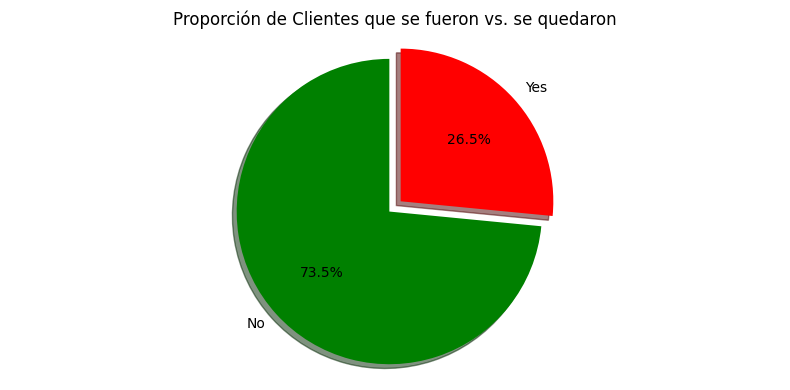

In [56]:
# Valores y etiquetas
valores = df_limpio['Churn'].value_counts()
etiquetas = valores.index
colores = ['green', 'red']

plt.figure(figsize=(8, 4))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    explode=(0, 0.1),  # Resaltar la porción de clientes que se fueron
    shadow=True
)

plt.title('Proporción de Clientes que se fueron vs. se quedaron')
plt.axis('equal')
plt.tight_layout()
plt.show()

Servicios más contratados por los clientes

¿Qué servicios son los más contratados por los clientes?

In [57]:
servicios = ['phone_PhoneService', 'internet_InternetService']

for servicio in servicios:
    conteo = df_limpio[servicio].value_counts()
    proporciones = df_limpio[servicio].value_counts(normalize=True) * 100

    resumen = pd.DataFrame({
        'Cantidad': conteo,
        'Porcentaje (%)': proporciones.map('{:.2f}%'.format)
    })

    print(f"Servicio: {servicio}")
    display(resumen)
    print("\n")

Servicio: phone_PhoneService


,Cantidad,Porcentaje (%)
phone_PhoneService,,
Yes,6361,90.32%
No,682,9.68%




Servicio: internet_InternetService


,Cantidad,Porcentaje (%)
internet_InternetService,,
Fiber optic,3096,43.96%
DSL,2421,34.37%
No,1526,21.67%


Distribución de churn según género
¿Existe diferencia en la tasa de abandono entre hombres y mujeres?

In [58]:
df_limpio.groupby(['customer_gender', 'Churn']).size().unstack()

Churn,No,Yes
customer_gender,,
Female,2549,939
Male,2625,930


Visualización del churn por género

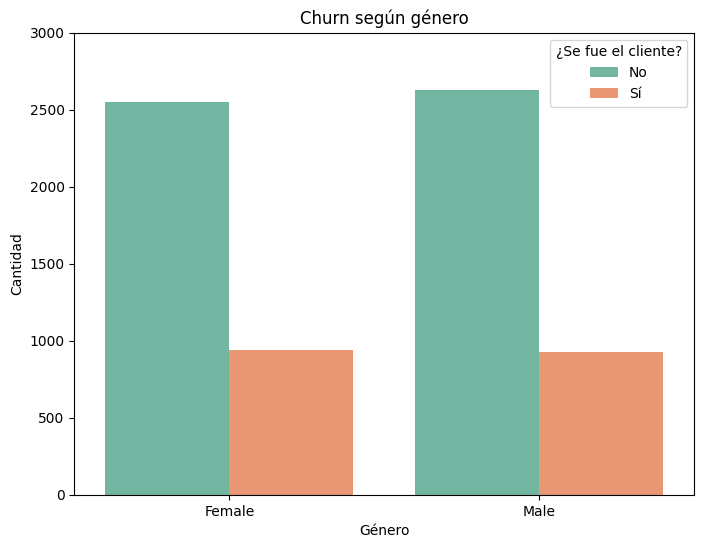

Géneros encontrados: ['Female' 'Male']


In [59]:

df_limpio['Churn_Label'] = df_limpio['Churn'].map({'No': 'No', 'Yes': 'Sí'})

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_limpio,
    x='customer_gender',
    hue='Churn_Label',
    palette='Set2'
)

plt.title('Churn según género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.ylim(0, 3000)
plt.legend(title='¿Se fue el cliente?')
plt.show()

print("Géneros encontrados:", df_limpio['customer_gender'].unique())

Proporción de churn por género
¿Qué género tiene mayor proporción de churn?

In [60]:
df_genero_churn = df_limpio.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack()

df_genero_churn_pct = df_genero_churn * 100
df_genero_churn_pct = df_genero_churn_pct.round(2)

print("Proporción de clientes que abandonaron (Churn) y que permanecieron, por género (%):")
display(df_genero_churn_pct)

Proporción de clientes que abandonaron (Churn) y que permanecieron, por género (%):


Churn,No,Yes
customer_gender,,
Female,73.08,26.92
Male,73.84,26.16


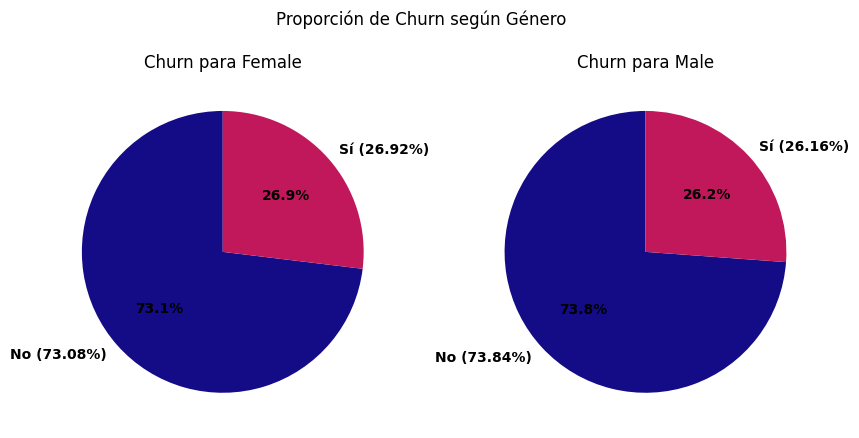

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colores = ["#140C87", "#C1175B"]

for i, gender in enumerate(df_genero_churn_pct.index):
    axes[i].pie(df_genero_churn_pct.loc[gender],
                labels=[f"No ({df_genero_churn_pct.loc[gender, 'No']}%)",
                        f"Sí ({df_genero_churn_pct.loc[gender, 'Yes']}%)"],
                colors=colores,
                autopct='%1.1f%%', startangle=90, textprops={'weight':'bold'})
    axes[i].set_title(f'Churn para {gender}')

plt.suptitle('Proporción de Churn según Género')
plt.show()

Permanencia media por género
¿Hay diferencias en la permanencia promedio entre hombres y mujeres?

In [62]:
permanencia_por_genero = df_limpio.groupby('customer_gender')['customer_tenure'].mean().round(1)
print(permanencia_por_genero)

customer_gender
Female    32.2
Male      32.5
Name: customer_tenure, dtype: float64



Distribución general de género en la base
¿Hay algún patrón demográfico evidente en los datos?

In [63]:
distribucion_genero = df_limpio['customer_gender'].value_counts(normalize=True) * 100
distribucion_genero = distribucion_genero.round(2).astype(str) + '%'
display(distribucion_genero)

,proportion
customer_gender,
Male,50.48%
Female,49.52%


📊 3.3 Servicios contratados
Esta sección analiza la relación entre el churn (abandono) y los servicios contratados por los clientes, incluyendo teléfono, internet, servicios adicionales y combinaciones.

Tasa de abandono según contratación de teléfono e internet
¿Los clientes que contratan servicios de teléfono/internet tienen mayor tasa de abandono?

In [64]:
def churn_por_servicio(servicios, df):
    for servicio in servicios:
        print(f"\n--- Churn por '{servicio}' ---")
        tabla = pd.crosstab(df[servicio], df['Churn'], normalize='index') * 100
        tabla = tabla.round(1).fillna(0)
        total_clientes = df[servicio].value_counts()
        tabla['Total'] = total_clientes
        tabla = tabla[['No', 'Yes', 'Total']]
        tabla.columns = ['Se quedaron (%)', 'Se fueron (%)', 'Total']
        print(tabla.to_string())

servicios_basicos = ['phone_PhoneService', 'internet_InternetService']

churn_por_servicio(servicios_basicos, df_limpio)


--- Churn por 'phone_PhoneService' ---
                    Se quedaron (%)  Se fueron (%)  Total
phone_PhoneService                                       
No                             75.1           24.9    682
Yes                            73.3           26.7   6361

--- Churn por 'internet_InternetService' ---
                          Se quedaron (%)  Se fueron (%)  Total
internet_InternetService                                       
DSL                                  81.0           19.0   2421
Fiber optic                          58.1           41.9   3096
No                                   92.6            7.4   1526


Churn según tipo de contrato
¿Qué tipo de contrato tienen los clientes que se fueron?

In [65]:
churn_contrato = pd.crosstab(df_limpio['account_Contract'], df_limpio['Churn'], normalize='index') * 100
churn_contrato = churn_contrato.round(1)
churn_contrato.columns = ['Se quedaron (%)', 'Se fueron (%)']
churn_contrato.index.name = 'Tipo de contrato'

print("\n--- Churn por tipo de contrato ---")
print(churn_contrato.to_string())


--- Churn por tipo de contrato ---
                  Se quedaron (%)  Se fueron (%)
Tipo de contrato                                
Month-to-month               57.3           42.7
One year                     88.7           11.3
Two year                     97.2            2.8


Distribución de churn según tipo de contrato

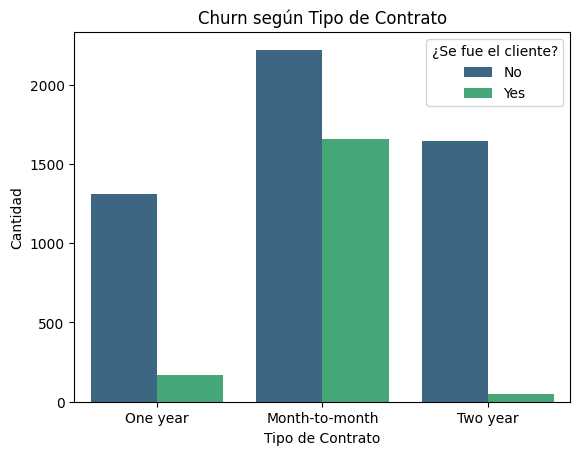

In [66]:
sns.countplot(data=df_limpio, x='account_Contract', hue='Churn', palette='viridis')
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.legend(title='¿Se fue el cliente?')
plt.show()

Servicios asociados con mayor churn
¿Qué tipo de servicios están más asociados con el churn?

In [67]:
servicios_adicionales = ['internet_StreamingTV', 'internet_StreamingMovies',
                         'internet_OnlineSecurity', 'internet_OnlineBackup']

for col in servicios_adicionales:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')
churn_por_servicio(servicios_adicionales, df_limpio)


--- Churn por 'internet_StreamingTV' ---
                      Se quedaron (%)  Se fueron (%)  Total
internet_StreamingTV                                       
No                               75.7           24.3   4336
Yes                              69.9           30.1   2707

--- Churn por 'internet_StreamingMovies' ---
                          Se quedaron (%)  Se fueron (%)  Total
internet_StreamingMovies                                       
No                                   75.6           24.4   4311
Yes                                  70.1           29.9   2732

--- Churn por 'internet_OnlineSecurity' ---
                         Se quedaron (%)  Se fueron (%)  Total
internet_OnlineSecurity                                       
No                                  68.7           31.3   5024
Yes                                 85.4           14.6   2019

--- Churn por 'internet_OnlineBackup' ---
                       Se quedaron (%)  Se fueron (%)  Total
internet_Online

Influencia de combinaciones de servicios en el churn
¿Hay combinaciones de servicios que influyen en la decisión de irse?

In [68]:
df_limpio['Phone_and_Internet'] = (
    df_limpio['phone_PhoneService'].astype(str) + '_' +
    df_limpio['internet_InternetService'].astype(str)
)

churn_combo = pd.crosstab(df_limpio['Phone_and_Internet'], df_limpio['Churn'], normalize='index') * 100
churn_combo = churn_combo.round(1)

for col in ['No', 'Yes']:
    if col not in churn_combo.columns:
        churn_combo[col] = 0.0

churn_combo = churn_combo[['No', 'Yes']]
churn_combo.columns = ['Se quedaron (%)', 'Se fueron (%)']

churn_combo = churn_combo.sort_values(by='Se fueron (%)', ascending=False)

print("\n--- Churn por combinación Phone + Internet ---")
print(churn_combo.to_string())


--- Churn por combinación Phone + Internet ---
                    Se quedaron (%)  Se fueron (%)
Phone_and_Internet                                
Yes_Fiber optic                58.1           41.9
No_DSL                         75.1           24.9
Yes_DSL                        83.4           16.6
Yes_No                         92.6            7.4


📊 3.4 Contratos y permanencia
Churn por tipo de contrato
¿Qué tipo de contrato está más asociado con la retención o abandono?

In [69]:
# Tabla de churn por tipo de contrato
churn_contrato = pd.crosstab(df_limpio['account_Contract'], df_limpio['Churn'], normalize='index') * 100
churn_contrato = churn_contrato.round(1)
churn_contrato.columns = ['Se quedaron (%)', 'Se fueron (%)']
churn_contrato.index.name = 'Tipo de contrato'

print("\n--- Churn por tipo de contrato ---")
print(churn_contrato.to_string())


--- Churn por tipo de contrato ---
                  Se quedaron (%)  Se fueron (%)
Tipo de contrato                                
Month-to-month               57.3           42.7
One year                     88.7           11.3
Two year                     97.2            2.8


Permanencia promedio según tipo de contrato
¿Cuál es la duración promedio de permanencia por tipo de contrato?

In [70]:
# Duración promedio de permanencia según contrato
tenure_promedio = df_limpio.groupby('account_Contract')['customer_tenure'].mean().round(1)
print("\n--- Duración promedio de permanencia por tipo de contrato (en meses) ---")
print(tenure_promedio.to_string())


--- Duración promedio de permanencia por tipo de contrato (en meses) ---
account_Contract
Month-to-month    18.0
One year          42.0
Two year          56.7


Churn según tiempo de permanencia
¿Cómo varía el churn según el tiempo que lleva el cliente en la compañía?

In [71]:
# Cálculo del churn promedio por mes de permanencia
churn_por_tenure = df_limpio.groupby('customer_tenure')['Churn'].apply(lambda x: (x == 'Yes').mean())

print("\n--- Churn promedio por meses de permanencia ---")
print(churn_por_tenure.head(20).round(3).to_string())


--- Churn promedio por meses de permanencia ---
customer_tenure
0     0.000
1     0.620
2     0.517
3     0.470
4     0.472
5     0.481
6     0.364
7     0.389
8     0.341
9     0.387
10    0.388
11    0.313
12    0.325
13    0.349
14    0.316
15    0.374
16    0.350
17    0.299
18    0.247
19    0.260


Gráfico de línea que muestra la tasa de abandono mensual a lo largo del tiempo

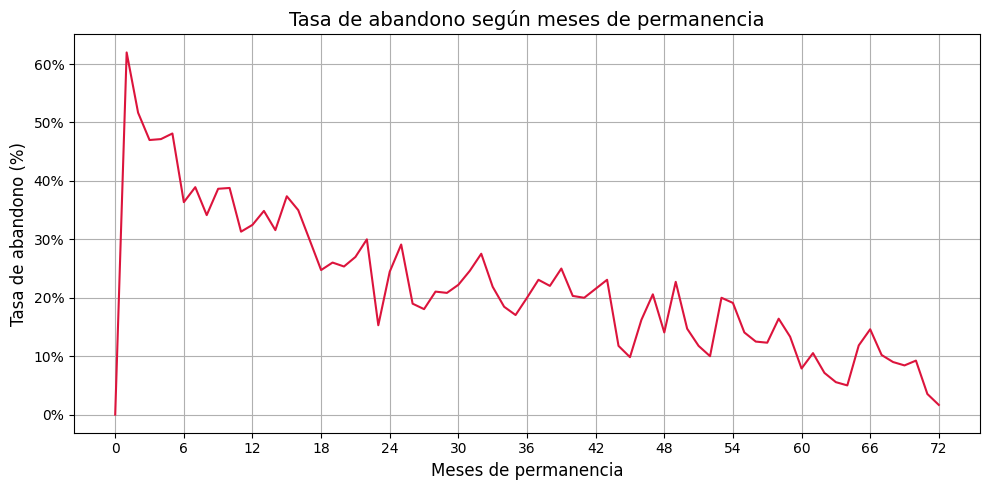

In [72]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=churn_por_tenure.index, y=churn_por_tenure.values * 100, color='crimson')  # ¡Multiplicamos por 100!

plt.title('Tasa de abandono según meses de permanencia', fontsize=14)
plt.xlabel('Meses de permanencia', fontsize=12)
plt.ylabel('Tasa de abandono (%)', fontsize=12)
plt.xticks(ticks=range(0, int(df_limpio['customer_tenure'].max()) + 1, 6))  # marcas cada 6 meses
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())  # Formato del eje Y como %
plt.grid(True)
plt.tight_layout()
plt.show()

Gráfico de línea enfocado solo en los primeros 12 meses

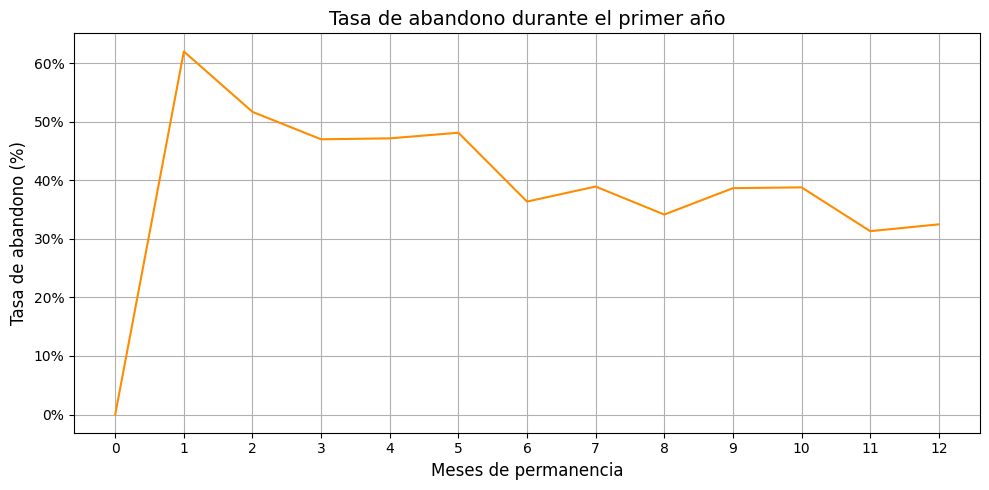

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=churn_por_tenure.index[:13],  # Solo de 0 a 12 meses
    y=(churn_por_tenure.values[:13] * 100),
    color='darkorange'
)

plt.title('Tasa de abandono durante el primer año', fontsize=14)
plt.xlabel('Meses de permanencia', fontsize=12)
plt.ylabel('Tasa de abandono (%)', fontsize=12)
plt.xticks(ticks=range(0, 13))  # de 0 a 12 meses
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(True)
plt.tight_layout()
plt.show()


📊 3.5 Método de pago
Revisión de los métodos de pago (por si hubo cambios)

In [74]:
print(df_limpio['account_PaymentMethod'].value_counts())

account_PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


Proporción de churn por método de pago
¿Hay métodos de pago con mayores tasas de abandono?

In [75]:
churn_por_pago = df_limpio.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(churn_por_pago)

Churn                            No       Yes
account_PaymentMethod                        
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


¿El uso de pago automático reduce el churn?

In [76]:
# Comparación directa entre pagos automáticos y churn
df_limpio['EsPagoAutomatico'] = df_limpio['account_PaymentMethod'].str.contains('automatic', case=False)
print(df_limpio.groupby('EsPagoAutomatico')['Churn'].value_counts(normalize=True).unstack())

Churn                   No       Yes
EsPagoAutomatico                    
False             0.653256  0.346744
True              0.840183  0.159817


¿Qué método es más común entre quienes permanecen?

In [77]:
df_no_churn = df_limpio[df_limpio['Churn'] == 'No']

metodos_no_churn = df_no_churn['account_PaymentMethod'].value_counts()

print("\n--- Método de pago más común entre quienes permanecen ---")
print(metodos_no_churn)


--- Método de pago más común entre quienes permanecen ---
account_PaymentMethod
Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: count, dtype: int64


Clientes que se fueron según método de pago

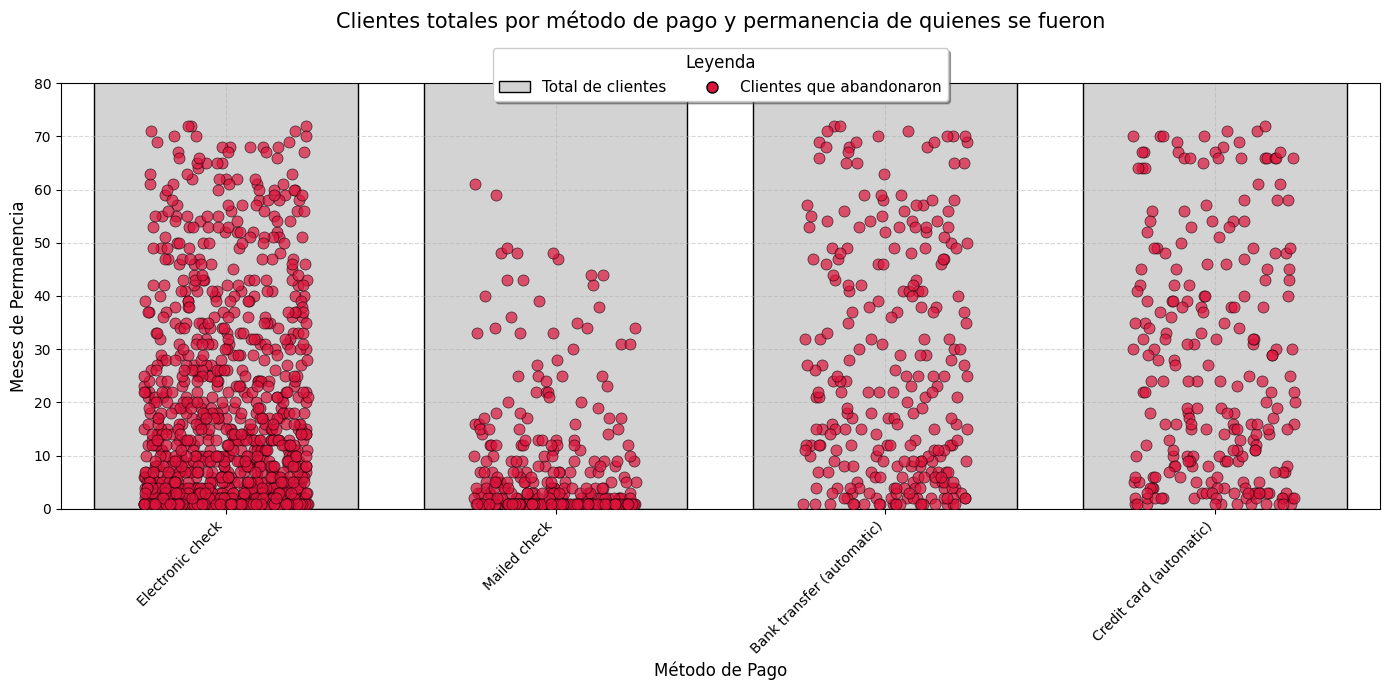

In [78]:
plt.figure(figsize=(14, 7))

df_churn = df_limpio[df_limpio['Churn'] == 'Yes']
orden_metodos = df_limpio['account_PaymentMethod'].value_counts().index
total_por_pago = df_limpio['account_PaymentMethod'].value_counts().reindex(orden_metodos)

sns.barplot(
    x=total_por_pago.index,
    y=total_por_pago.values,
    color='lightgray',
    edgecolor='black'
)

sns.stripplot(
    data=df_churn,
    x='account_PaymentMethod',
    y='customer_tenure',
    order=orden_metodos,
    jitter=0.25,
    size=8,
    color='crimson',
    alpha=0.7,
    linewidth=0.5,
    edgecolor='black'
)

plt.title('Clientes totales por método de pago y permanencia de quienes se fueron', fontsize=15, pad=40)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Meses de Permanencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 80)
plt.grid(True, linestyle='--', alpha=0.5)

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Total de clientes'),
    Line2D([0], [0], marker='o', color='crimson', label='Clientes que abandonaron',
           markerfacecolor='crimson', markersize=8, linestyle='None', markeredgecolor='black')
]

plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.10),
    ncol=2,
    fontsize=11,
    title='Leyenda',
    title_fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=True
)

plt.tight_layout()
plt.show()

📊 3.6 Análisis de cargos y tenure
Crear columna categórica de antigüedad

In [79]:
df_limpio['grupo_tenure'] = pd.cut(
    df_limpio['customer_tenure'],
    bins=[0, 6, 12, 24, 48, 72],
    labels=['0-6', '6-12', '12-24', '24-48', '48-72']
)

print("Distribución de clientes por grupo de antigüedad (tenure en meses):\n")
print(df_limpio['grupo_tenure'].value_counts().sort_index().to_string())

Distribución de clientes por grupo de antigüedad (tenure en meses):

grupo_tenure
0-6      1470
6-12      705
12-24    1024
24-48    1594
48-72    2239


Distribución de cargos mensuales por grupo de tenure

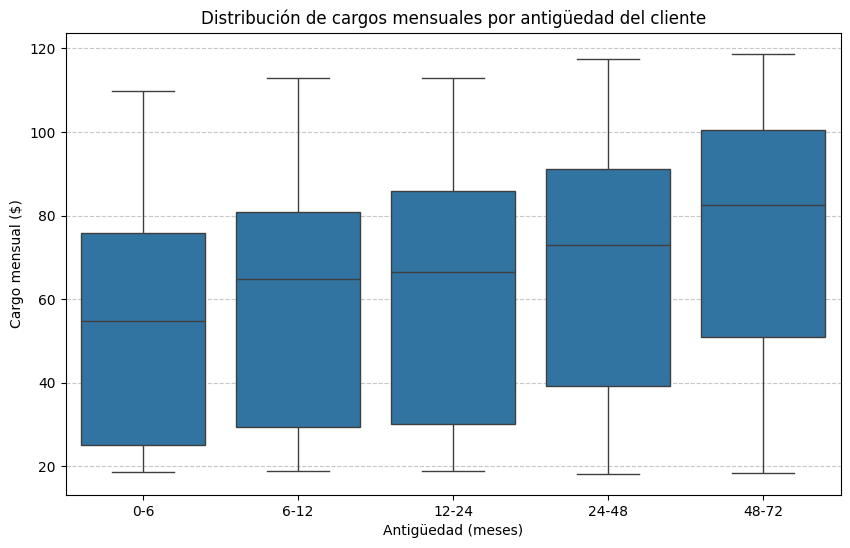

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_limpio, x='grupo_tenure', y='account_Charges_Monthly')
plt.title('Distribución de cargos mensuales por antigüedad del cliente')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Cargo mensual ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estadísticas descriptivas de cargos totales

In [81]:

stats_cargos = df_limpio['account_Charges_Total'].describe()
print(stats_cargos)
print(f"\nEl cargo total promedio es de {stats_cargos['mean']:.2f}, con un mínimo de {stats_cargos['min']} y un máximo de {stats_cargos['max']}.")

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: account_Charges_Total, dtype: float64

El cargo total promedio es de 2283.30, con un mínimo de 18.8 y un máximo de 8684.8.


Relación entre cargos totales y abandono

In [82]:

promedio_cargos_churn = df_limpio.groupby('Churn')['account_Charges_Total'].mean()
print(promedio_cargos_churn)
print(f"\nLos clientes que abandonaron pagan en promedio {promedio_cargos_churn['Yes']:.2f}, mientras que los que permanecen pagan {promedio_cargos_churn['No']:.2f}.")

Churn
No     2555.344141
Yes    1531.796094
Name: account_Charges_Total, dtype: float64

Los clientes que abandonaron pagan en promedio 1531.80, mientras que los que permanecen pagan 2555.34.


Estadísticas de cargos totales por Churn

In [83]:
print(df_limpio.groupby('Churn')['account_Charges_Total'].describe())

        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
No     5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
Yes    1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
No     8672.45  
Yes    8684.80  


Análisis visual de cargos totales por churn

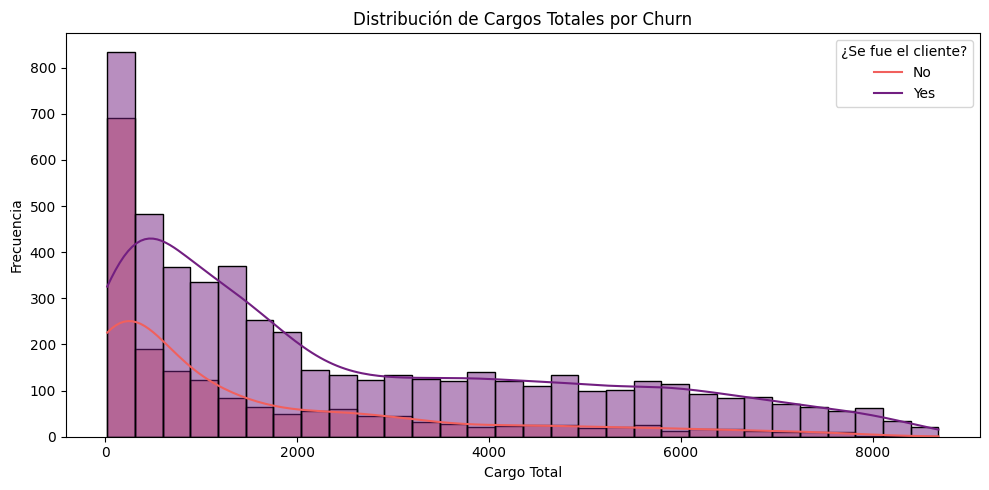

In [84]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_limpio,
    x='account_Charges_Total',
    hue='Churn',
    kde=True,
    palette='magma',
    bins=30,
    multiple='layer'
)
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Cargo Total')
plt.ylabel('Frecuencia')
plt.legend(title='¿Se fue el cliente?', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Relación entre permanencia (tenure) y churn

In [85]:
print(df_binario.groupby('Churn')['customer_tenure'].mean())
print("\nCorrelación tenure vs churn:")
print(df_binario[['customer_tenure', 'Churn']].corr())

Churn
0    37.569965
1    17.979133
Name: customer_tenure, dtype: float64

Correlación tenure vs churn:
                 customer_tenure     Churn
customer_tenure         1.000000 -0.352229
Churn                  -0.352229  1.000000


Relación visual entre tenure y cargos totales según Churn

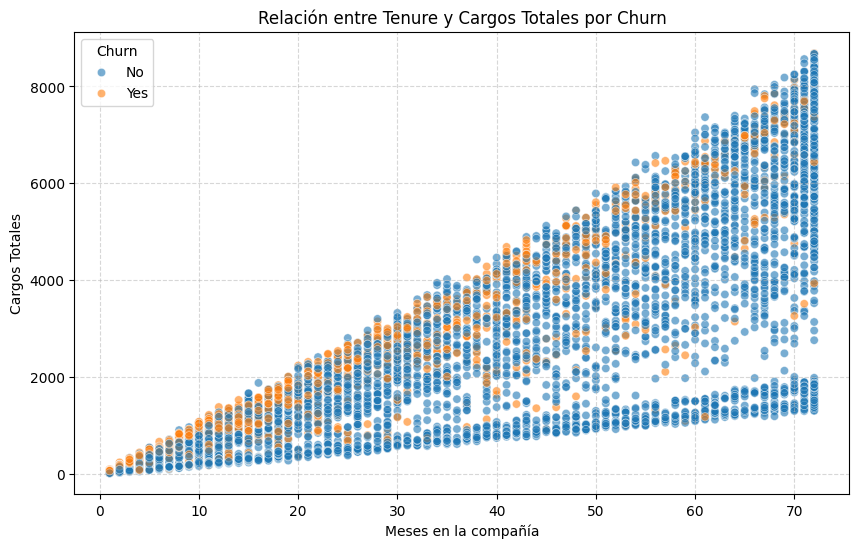

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_limpio,
    x='customer_tenure',
    y='account_Charges_Total',
    hue='Churn',
    alpha=0.6
)
plt.title('Relación entre Tenure y Cargos Totales por Churn')
plt.xlabel('Meses en la compañía')
plt.ylabel('Cargos Totales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Análisis del método de pago y su relación con el abandono (Churn)

In [90]:
print(df_binario.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias']


¿El uso de cheques electrónicos influye en el abandono temprano de clientes?

Crear columna eCheck en df_binario

In [91]:
df_binario['eCheck'] = df_binario['account_PaymentMethod'].str.contains('Electronic check', case=False)
print(df_binario[['account_PaymentMethod', 'eCheck']].head(10))

tasa_churn_echeck = df_binario[df_binario['eCheck']]['Churn'].mean() * 100
tasa_churn_no_echeck = df_binario[~df_binario['eCheck']]['Churn'].mean() * 100

print(f"Tasa de churn con eCheck: {tasa_churn_echeck:.2f}%")
print(f"Tasa de churn sin eCheck: {tasa_churn_no_echeck:.2f}%")

       account_PaymentMethod  eCheck
0               Mailed check   False
1               Mailed check   False
2           Electronic check    True
3           Electronic check    True
4               Mailed check   False
5    Credit card (automatic)   False
6  Bank transfer (automatic)   False
7    Credit card (automatic)   False
8           Electronic check    True
9               Mailed check   False
Tasa de churn con eCheck: 45.29%
Tasa de churn sin eCheck: 17.06%


#📄Informe final


📊 Análisis del Abandono de Clientes en Telecomunicaciones
1. Informe general
Este análisis explora los factores asociados al abandono de clientes (churn) en una empresa de telecomunicaciones. La tasa de abandono alcanza el 26.54%, lo que refleja una necesidad urgente de implementar estrategias de permanencia.

Los hallazgos muestran que la permanencia está estrechamente relacionada con el tipo de contrato, el método de pago y los servicios contratados. A partir de los patrones identificados, se proponen recomendaciones específicas para reducir el churn. Además, se incluyen advertencias sobre posibles limitaciones y sesgos en la interpretación de los datos.

2. Hallazgos Clave
2.1 Churn Global
Clientes que abandonaron: 26.54%
Clientes leales: 73.46%
2.2 Perfil Demográfico
Distribución por género: 50.5% hombres, 49.5% mujeres
Permanencia media similar: ~32 meses
Tasa de churn por género:
Hombres: 26.5%
Mujeres: 26.6%
Conclusión: El género no es un factor determinante en el abandono.

2.3 Servicios Contratados
Internet por fibra óptica: churn elevado (41.9%)
Sin servicio de Internet: churn bajo (7.4%)
Teléfono: impacto leve
2.4 Combinación de Servicios
Más riesgosa: Teléfono + Internet por fibra óptica
Más estable: Teléfono + Sin servicio de Internet
Hipótesis: Algunas combinaciones agravan el riesgo de churn, posiblemente por costos, complejidad del servicio o problemas técnicos acumulados.

2.5 Contrato y Permanencia
Mensual: 42.7% de churn
Anual: 11.3%
Bienal: 2.8%
Tenure y churn:

< 6 meses: 40.8%
60 meses: 6.5%

Hipótesis: Existen diferencias claras en la tasa de abandono según el tiempo de permanencia, pero no contamos con datos suficientes para conocer las causas concretas. Es posible que los clientes con mayor antigüedad hayan accedido a promociones atractivas o tengan una relación más consolidada, mientras que los nuevos clientes podrían estar abandonando por insatisfacción inicial, onboarding deficiente o expectativas no cumplidas.

Propuesta: Para validar estas ideas, se requiere información adicional como:

Datos de uso del servicio durante los primeros meses
Experiencia de contratación y activación del servicio
Satisfacción en etapas tempranas del ciclo de vida del cliente
Además, los datos muestran que, a pesar de su corta permanencia, estos nuevos clientes también tienen cargos totales bajos, lo que sugiere que abandonaron antes de generar una relación de valor con la empresa.

2.6 Servicios de Internet
Los servicios como OnlineSecurity y OnlineBackup se asocian a menor churn, lo que sugiere que aportan valor percibido al cliente.

En cambio, StreamingTV y StreamingMovies se relacionan con mayores tasas de churn. Una posible hipótesis es que estos servicios, al no estar incluidos en paquetes completos o requerir pagos adicionales por contenido exclusivo, podrían estar generando insatisfacción.

Propuesta: Para validar estas hipótesis se requiere información adicional sobre uso real del servicio, accesos restringidos, y experiencia del cliente con el contenido ofrecido.

2.7 Método de Pago
Cheque electrónico (eCheck): churn alto (45.3%)
Métodos automáticos (tarjeta/crédito o débito bancario): churn bajo (15–16%)
Este hallazgo revela una brecha importante en la tasa de abandono según el método de pago utilizado. Los clientes que utilizan cheques electrónicos presentan más del doble de tasa de abandono respecto a quienes optan por pagos automáticos.

Hipótesis:

El alto churn entre usuarios de eCheck podría estar relacionado con una fricción operativa en el proceso de cobro. En muchos sistemas de pago electrónico tipo ACH (Automated Clearing House), el cliente espera cierto lapso de días entre la autorización y el débito real. Si la empresa cobra el servicio de forma inmediata tras la solicitud, esto puede:

Provocar rechazos por fondos insuficientes
Generar molestia o desconfianza por la falta de sincronización con las expectativas del cliente
Derivar en una cancelación temprana del servicio
Además, es posible que el momento del cobro mensual no esté alineado con los ciclos de ingresos del cliente. Por ejemplo:

Si el cobro se ejecuta el día 20 del mes, pero la remuneración laboral del cliente se recibe recién el día 30 o durante la primera semana del mes siguiente, esto puede provocar rechazos automáticos por fondos insuficientes, incluso si el cliente desea pagar.

Este desajuste temporal puede generar:

Malestar por cargos fallidos o penalidades
Sensación de desorganización o falta de control financiero
Riesgo de churn no por insatisfacción con el servicio, sino por tensiones de liquidez momentáneas
Conclusión parcial: El uso de eCheck podría estar reflejando no solo una elección de método de pago, sino también una realidad económica del cliente (como baja bancarización, ingresos variables o necesidad de postergar gastos). Esto lo convierte en una variable crítica para estrategias de retención adaptadas a segmentos más sensibles.

Este patrón sugiere una línea de investigación prometedora, pero no puede ser confirmado sin datos adicionales sobre fechas de cobro, comportamiento de pago, rechazos y retroalimentación directa de los clientes.

2.8 Cargos y Permanencia
Tenure y TotalCharges: relación positiva clara (acumulación lógica)
MonthlyCharges vs churn: no se observa una correlación fuerte
3. Recomendaciones
Estrategias de Retención
Implementar onboarding y seguimiento a nuevos clientes (0–6 meses)
Promover servicios de valor agregado como seguridad en línea
Identificar combinaciones de servicios con alto riesgo y rediseñar paquetes
Expectativa de Pagos
Fomentar pagos automáticos con descuentos o tarifas fijas
Reducir el uso de cheques electrónicos mediante incentivos a la migración digital
Ajustar la fecha de cobro mensual para alinearla con los ingresos del cliente, o permitir que el cliente elija su fecha de pago
4. Limitaciones del Análisis
Información no disponible
Preferencias de contenido (TV, películas, deportes)
Variables sociodemográficas clave (ingresos, educación, ocupación)
Fechas de alta y baja para estudiar patrones temporales
Motivos explícitos de cancelación (precio, insatisfacción, falta de uso)
Métricas de satisfacción del cliente (quejas, soporte)
Estas limitaciones dificultan una comprensión completa de las causas subyacentes del churn. Algunas relaciones detectadas podrían estar influidas por variables no observadas.

5. Consideraciones críticas sobre el dataset
Durante el análisis surgieron incoherencias aparentes como:

Clientes nuevos con muy bajo tenure (<6 meses) tienen cargos totales muy bajos pero alta tasa de churn.
No se observan cargos altos en estos nuevos clientes, lo que sugiere que no hubo tiempo suficiente para acumular pagos significativos.
Hipótesis: Muchos clientes nuevos podrían abandonar antes de generar una relación de valor, posiblemente por:

Mala experiencia de contratación o activación del servicio
Problemas técnicos iniciales
Expectativas no cumplidas desde el primer mes
Advertencia técnica:

El dataset no permite validar si estos clientes utilizaron el servicio activamente, ni si existió un onboarding efectivo. Tampoco podemos verificar si hubo problemas en la captación de clientes que generaron altas no efectivas (sin consumo real).

Por lo tanto, las conclusiones deben entenderse como hipótesis informadas, no como afirmaciones determinantes.

Conclusión Final
El análisis revela que el abandono de clientes está fuertemente vinculado al tipo de contrato, método de pago y servicios contratados. Clientes nuevos y con contratos cortos son los más vulnerables, pero no necesariamente por pagar más, sino por no encontrar valor rápidamente.

La estabilidad tarifaria, el acceso a servicios útiles y la experiencia inicial del cliente son claves para fomentar la permanencia.

Mejorar la comunicación, ajustar ofertas, personalizar el onboarding y facilitar métodos de pago automáticos son estrategias recomendadas para reducir el churn y aumentar la lealtad.